
# ANALISE DE DADOS COMPRAS
#### METAS:
+ Lista dos 10 materiais mais consumidos pela Konemetal - OK
+ Mostra a evolução de preços de itens específicos - OK
+ Exibir total de compra com cada fornecedor
+ Exibir gasto de cada fornecedores (bitolas e norma)
+ Exibir por fornecedor os valores médios de custos dos tipos de materia prima
+ Tempo medio de demora para chegar um material depois de comprado por fornecedor
+ Tempo medio de demora para comprar o material depois de solicitado
+ Qual dia da semana que mais chega material
+ Definir Formula matematica para comprar material extra para estoque de acordo com seu uso
+ Definir Metas de compras

___

### Imports

In [1]:
import pandas as pd
import datetime
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

### Configs

In [2]:
sns.set_theme(style="darkgrid")

### Connecting to a database

In [3]:
conn = sqlite3.connect('C:\\Users\\Leo\\Documents\\GitHub\\StockBuyRep\\configuration\\database\\konemetal.sqlite3')
df = pd.read_sql('SELECT * FROM Konemetal_Historic', conn)

___

### Analise geral do data frame

In [4]:
# Show all columns
_colunas = df.columns
print(_colunas)

Index(['id', 'Bitola', 'Material', 'Norma', 'Dimensao', 'Fabricacao',
       'Fornecedor', 'Valor', 'Kg_Solicitado', 'Kg_Comprado', 'Kg_Recebido',
       'Data_Entrega_Peca', 'Data_Solicitado', 'Data_Comprado',
       'Data_Previsao', 'Data_Recebido', 'Ordem_Compra', 'Nota_Fiscal',
       'Documento', 'Codigo_Peca', 'Solicitante'],
      dtype='object')


In [5]:
df.describe()

,id,Valor,Kg_Solicitado,Kg_Comprado
count,312.000000,312.000000,312.000000,312.000000
mean,156.500000,16.031186,306.259615,187.387821
std,90.210864,10.677698,2793.606419,232.510997
min,1.000000,5.470000,1.000000,2.000000
25%,78.750000,11.460000,29.000000,50.000000
50%,156.500000,13.070000,68.000000,100.500000
75%,234.250000,14.500000,171.000000,250.000000
max,312.000000,89.000000,49350.000000,2330.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 312 non-null    int64  
 1   Bitola             312 non-null    object 
 2   Material           312 non-null    object 
 3   Norma              312 non-null    object 
 4   Dimensao           312 non-null    object 
 5   Fabricacao         312 non-null    object 
 6   Fornecedor         312 non-null    object 
 7   Valor              312 non-null    float64
 8   Kg_Solicitado      312 non-null    int64  
 9   Kg_Comprado        312 non-null    int64  
 10  Kg_Recebido        312 non-null    object 
 11  Data_Entrega_Peca  312 non-null    object 
 12  Data_Solicitado    312 non-null    object 
 13  Data_Comprado      312 non-null    object 
 14  Data_Previsao      303 non-null    object 
 15  Data_Recebido      312 non-null    object 
 16  Ordem_Compra       312 non

In [7]:
df.head(100)

,id,Bitola,Material,Norma,Dimensao,Fabricacao,Fornecedor,Valor,Kg_Solicitado,Kg_Comprado,...,Data_Entrega_Peca,Data_Solicitado,Data_Comprado,Data_Previsao,Data_Recebido,Ordem_Compra,Nota_Fiscal,Documento,Codigo_Peca,Solicitante
0,1,S,A,C,22,TREFILADO,arcelormittal,13.07,122,206,...,2024-02-08,2024-01-10,2024-01-03,2024-01-10,2024-01-10,4821,001456469,334021,None,None
1,2,S,A,C,14,TREFILADO,arcelormittal,13.07,25,100,...,2024-03-08,2024-01-10,2024-01-03,2024-01-10,2024-01-10,4821,001456469,334136,None,None
2,3,S,A,C,14,TREFILADO,arcelormittal,13.07,28,100,...,2024-03-08,2024-01-10,2024-01-03,2024-01-10,2024-01-10,4821,001456469,334139,None,None
3,4,S,A,C,1-1/8,TREFILADO,arcelormittal,13.07,19,100,...,2024-03-18,2024-01-10,2024-01-03,2024-01-10,2024-01-10,4821,001456469,334110,None,None
4,5,S,A,C,1-1/8,TREFILADO,arcelormittal,13.07,93,100,...,2024-03-18,2024-01-10,2024-01-03,2024-01-10,2024-01-10,4821,001456469,334111,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,S,A,C,30,TREFILADO,Arcelormittal,13.07,19,45,...,2024-04-29,2024-02-29,2024-03-28,2024-04-13,2024-04-05,4895,ESTOQUE,334377,None,None
96,97,R,A,C,5/8,TREFILADO,Arcelormittal,11.30,41,43,...,2024-04-19,2024-02-09,2024-03-28,2024-04-01,2024-04-08,4895,1480560,334303,,None
97,98,R,A,C,5/8,TREFILADO,Arcelormittal,11.30,33,35,...,2024-05-09,2024-02-29,2024-03-28,2024-04-01,2024-04-08,4895,1480560,334394,None,None
98,99,R,A,C,5/8,TREFILADO,Arcelormittal,11.30,54,56,...,2024-04-27,2024-03-15,2024-03-28,2024-04-01,2024-04-08,4895,1480560,334246,None,None


In [8]:
_ = df[df['Fornecedor'] == 'Inbraforja/Trefita']
_.head()

,id,Bitola,Material,Norma,Dimensao,Fabricacao,Fornecedor,Valor,Kg_Solicitado,Kg_Comprado,...,Data_Entrega_Peca,Data_Solicitado,Data_Comprado,Data_Previsao,Data_Recebido,Ordem_Compra,Nota_Fiscal,Documento,Codigo_Peca,Solicitante
184,185,K,A,G,3,FORJADO,Inbraforja/Trefita,5.47,15,109,...,2024-04-22,2024-03-13,2024-04-16,2024-04-30,2024-05-22,4907,4814,334438,None,None
221,222,CZ,A,G,6,TREFILADO,Inbraforja/Trefita,19.00,110,144,...,2024-05-14,2024-03-26,2024-04-16,2024-04-30,2024-06-12,4907,estoque,334507,,None


______

### Lista dos 10 materiais mais consumidos

In [20]:
# df.drop(columns=['id'])
top10 = df.groupby([df['Bitola'], df['Material'], df['Norma'], df['Fabricacao'], df['Dimensao']]).sum().sort_values(by='Kg_Comprado', ascending=False).drop(columns=['id', 'Kg_Solicitado']).reset_index()
top10['media mes'] = top10['Kg_Comprado']/7.2
top10.head(60)

,Bitola,Material,Norma,Fabricacao,Dimensao,Valor,Kg_Comprado,media mes
0,R,A,C,TREFILADO,25,373.58,10408,1445.555556
1,R,A,G,LAMINADO,1-1/4,89.74,5970,829.166667
2,S,A,C,TREFILADO,1-1/16,323.06,4094,568.611111
3,R,A,C,TREFILADO,1-1/2,56.97,2440,338.888889
4,S,A,C,TREFILADO,36,96.14,2349,326.250000
5,R,A,G,LAMINADO,"1-5/8""",6.68,2330,323.611111
6,S,A,C,TREFILADO,32,165.15,2066,286.944444
7,S,A,C,TREFILADO,22,143.98,1647,228.750000
8,S,A,C,TREFILADO,30,210.58,1617,224.583333
9,R,A,G,LAMINADO,"1""",13.53,1400,194.444444


___

### Mostra a evolução de preços de itens específicos

In [10]:
bitola_price_evolution = 'R'
dimensao_price_evolution = '25'

In [11]:
df_item_price = df[(df['Bitola'] == bitola_price_evolution) & (df['Dimensao'] == dimensao_price_evolution)]
df_item_price = df_item_price.drop(columns=['Kg_Solicitado','Kg_Comprado','Data_Entrega_Peca','Data_Solicitado','Data_Comprado','Data_Previsao','Codigo_Peca','Solicitante'])
df_item_price.head(50)

,id,Bitola,Material,Norma,Dimensao,Fabricacao,Fornecedor,Valor,Kg_Recebido,Data_Recebido,Ordem_Compra,Nota_Fiscal,Documento
21,22,R,A,C,25,TREFILADO,Arcelormittal,11.36,553,2024-01-23,4823,1460869,334251
36,37,R,A,C,25,TREFILADO,arcelormittal,11.36,51,2024-02-01,4823,703888,estoque
37,38,R,A,C,25,TREFILADO,AçoTubo,11.50,667,2024-02-01,4844,703888,334119
38,39,R,A,C,25,TREFILADO,AçoTubo,11.50,91,2024-02-01,4844,703888,334158
48,49,R,A,C,25,TREFILADO,arcelormittal,11.36,57,2024-02-20,4855,cancelado,334193
74,75,R,A,C,25,TREFILADO,Arcelormittal,11.36,644,2024-03-13,4864,1472113,334048
108,109,R,A,C,25,TREFILADO,Arcelormittal,11.30,-16,2024-04-08,4895,1480564,334112
109,110,R,A,C,25,TREFILADO,Arcelormittal,11.30,367,2024-04-08,4895,1480564,334203
110,111,R,A,C,25,TREFILADO,arcelormittal,11.36,186,2024-04-08,4855,1480564,334232
123,124,R,A,C,25,TREFILADO,Arcelormittal,11.46,456,2024-04-18,4906,4782457,334203


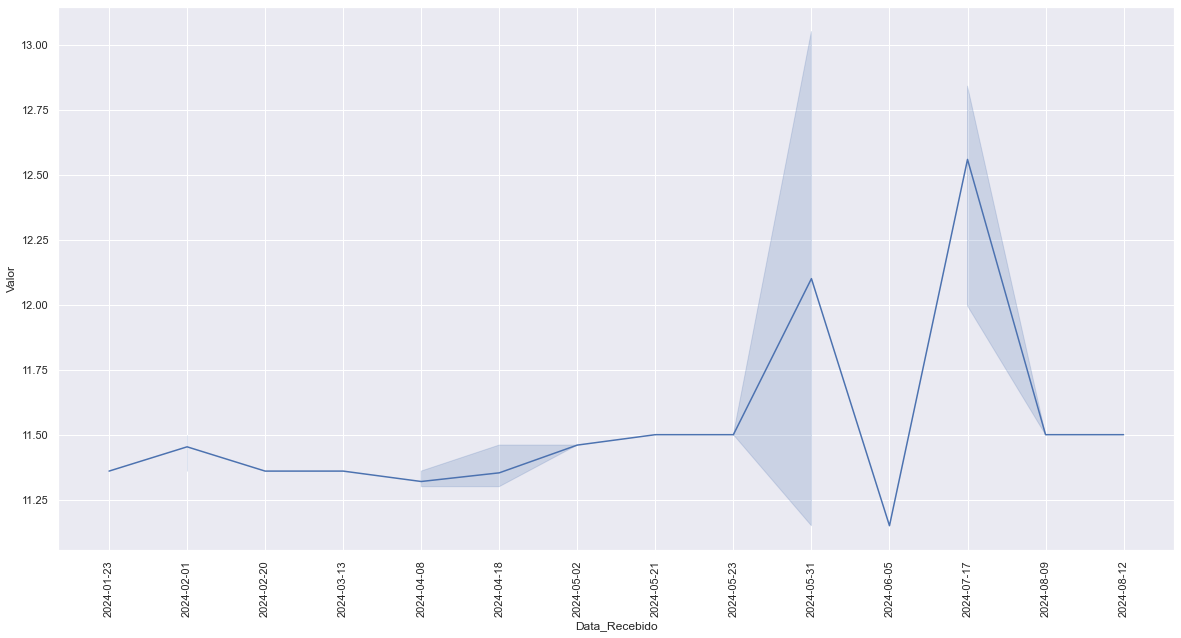

In [12]:

plt.figure(figsize=(20, 10))
sns.lineplot(x='Data_Recebido',y='Valor',data=df_item_price)
plt.xticks(rotation=90)
plt.show()

In [13]:
df_item_price['Valor'].describe()

count    32.000000
mean     11.674375
std       0.596706
min      11.150000
25%      11.360000
50%      11.500000
75%      11.500000
max      13.050000
Name: Valor, dtype: float64

____

### Exibir total de compra com cada fornecedor

In [14]:
pd.unique(df['Fornecedor'])

array(['arcelormittal', 'Arcelormittal', 'AçoTubo', 'AçoVisa',
       'Ferbronze', 'Trefita', 'hennings', 'Aços Favorit', 'Elinox',
       'Aços Trefita', 'Kentucky', 'trefita', 'Aco Visa', 'Joy Tubos',
       'JoyTubos', 'Arcelormital', 'Hennings', 'Aço trefita',
       'Aços trefita', 'Aço forte', 'Aço Forte', 'Mercurio',
       'Inbraforja/Trefita', 'AçoForte', 'Açotubo', 'açovisa', 'açovida',
       'Tubo certo', 'Açotubo ', 'Joytubos', 'AçosFavorit',
       ' Aços Trefita', 'Tesla', 'Favorit', 'Mecurio', 'Inbraforja',
       'Arinox', 'joytubos'], dtype=object)